In [1]:
# Import libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from tensorflow.keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.image import ImageDataGenerator
import cv2
import time
import os



# 1. Data Loading and Preprocessing:

In [2]:
# Load the CIFAR-10 dataset
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
# Finding the size of the dataset
print('Training data:', train_images.shape, train_labels.shape)
print('Test data:', test_images.shape, test_labels.shape)

#Converting labels single dimensional
train_labels=np.ravel(train_labels)
print(train_labels.shape)

test_labels=np.ravel(test_labels)
print(test_labels.shape)

Training data: (50000, 32, 32, 3) (50000, 1)
Test data: (10000, 32, 32, 3) (10000, 1)
(50000,)
(10000,)


In [4]:
#Assinging class names to the output labels 
class_names=['Airplane','Automobile','Bird','Cat','Deer','Dog','frog','Horse','Ship','Truck']

In [5]:
#Normalization of the data
train_images = train_images / 255.0
test_images = test_images / 255.0
print(train_images.min(), train_images.max())

0.0 1.0


# 2. Build a baseline CNN model with the following architecture:

In [48]:
#Implementing Baseline CNN Model

import tensorflow as tf
from tensorflow.keras import layers, models

# To avoid Kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# define the  CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [49]:
#Compiling the model and printing the summary of the baseline model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# 3. Implement data augmentation using the Keras ImageDataGenerator:

In [6]:
# Create an ImageDataGenerator for the "training" images,
# with the desired image transformations
datagen = ImageDataGenerator(
rescale=1 / 255.0,
rotation_range=20,
zoom_range=0.05,
width_shift_range=0.05,
height_shift_range=0.05,
shear_range=0.05,
horizontal_flip=True,
fill_mode="nearest",
validation_split=0.20)

# Declare an ImageDataGenerator for the "testing images"
test_datagen = ImageDataGenerator(rescale=1 / 255.0)


# 4. Augmented CNN Model:
 Build a CNN model like the baseline model but include data augmentation using the 
ImageDataGenerator for the training data.
• Compile the augmented model with the same loss and metrics as the baseline 
model.
• Implement data loading and preprocessing in two ways: a) Reading the image data 
from the disk (using ImageDataGenerator with flow_from_directory), and b) Loading 
the entire dataset into memory.

In [80]:
# To avoid Kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


# Defining the neural network model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

dmodel = Sequential()
dmodel.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
dmodel.add(MaxPooling2D(pool_size=(2, 2)))
dmodel.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
dmodel.add(MaxPooling2D(pool_size=(2, 2)))
dmodel.add(Conv2D(64,kernel_size=(3,3), activation='relu'))
dmodel.add(MaxPooling2D(pool_size=(2, 2)))
dmodel.add(Flatten())
dmodel.add(Dense(128, activation = 'relu'))
dmodel.add(Dropout(0.25))
dmodel.add(Dense(10, activation = 'softmax'))



In [63]:
#Compiling the model and printing the summary of the Data Augumented model
dmodel.compile(loss = 'categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
dmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 64)        

In [ ]:
# a) Reading the image data from the disk (using ImageDataGenerator with flow_from_directory)

In [ ]:
# Create the folders to store the data on the disk "cifar-10-data")
if not os.path.exists("cifar-10-data"):
    os.mkdir("cifar-10-data")
    train_path = os.path.join("cifar-10-data", "train")
    test_path = os.path.join("cifar-10-data", "test")
if not os.path.isdir(train_path):
    os.mkdir(train_path)
    os.mkdir(test_path) 
for i in class_names:
    os.mkdir(os.path.join(train_path, str(i)))
    os.mkdir(os.path.join(test_path, str(i)))
train_path=train_path
test_path=test_path

In [ ]:
# Save the "training" images in the corresponding folders based on their class (or label)
for i in range(50000):
    fname = "img-" + str(i) + ".jpg"
    cv2.imwrite(os.path.join(train_path, str(class_names[train_labels[i]]), fname),train_images[i])
# Save the "testing" images in the corresponding folders based on their class (or label)
for i in range(10000):
    fname = "img-"+ str(i) + ".jpg"
    cv2.imwrite(os.path.join(test_path, str(class_names[test_labels[i]]), fname), test_images[i])

In [7]:
train_path='cifar-10-data/train'
batch_size =80
# Define iterator to serve "training" images
train_generator = datagen.flow_from_directory(
directory = train_path,
target_size = (32,32),
color_mode = "rgb",
#color_mode = "grayscale",
batch_size = batch_size,
subset = 'training',
shuffle = True,
seed = 97
)


Found 40000 images belonging to 10 classes.


In [8]:
valid_generator = datagen.flow_from_directory( # Iterator for the "validation" dataset
directory = train_path,
target_size = (32,32),
color_mode = "rgb",
batch_size=batch_size,
subset = 'validation',
shuffle = True,
seed = 97
)


Found 10000 images belonging to 10 classes.


In [9]:
test_path="cifar-10-data/test"
test_generator = test_datagen.flow_from_directory( # Iterator for the "testing" dataset
directory = test_path,
target_size = (32,32),
color_mode = "rgb",
batch_size = batch_size,
shuffle = False,
seed = 42
)

Found 10000 images belonging to 10 classes.


In [ ]:
#b) Loading the entire dataset into memory.

In [86]:
train_data=datagen.flow(train_images,train_labels,batch_size=128)

# we have loaded the entire data into the memory and we can using while training the model

# 5. Training and Evaluation:
• Train both the baseline and augmented models on the training data. Monitor and 
plot the training and validation accuracy and loss for each model.
• Evaluate both models on the testing data and report the test accuracy for each.

In [54]:
#Training Baseline Model 

#Training the model
history = model.fit (train_images, train_labels, epochs=10, batch_size=80, validation_split=0.2)

Epoch 1/10
500/500 [==============================] - 48s 91ms/step - loss: 1.5770 - accuracy: 0.4292 - val_loss: 1.3247 - val_accuracy: 0.5307
Epoch 2/10
500/500 [==============================] - 39s 78ms/step - loss: 1.2286 - accuracy: 0.5658 - val_loss: 1.1609 - val_accuracy: 0.5928
Epoch 3/10
500/500 [==============================] - 41s 81ms/step - loss: 1.0726 - accuracy: 0.6260 - val_loss: 1.0444 - val_accuracy: 0.6351
Epoch 4/10
500/500 [==============================] - 40s 79ms/step - loss: 0.9779 - accuracy: 0.6589 - val_loss: 1.0059 - val_accuracy: 0.6508
Epoch 5/10
500/500 [==============================] - 40s 80ms/step - loss: 0.9034 - accuracy: 0.6865 - val_loss: 0.9968 - val_accuracy: 0.6524
Epoch 6/10
500/500 [==============================] - 40s 81ms/step - loss: 0.8442 - accuracy: 0.7070 - val_loss: 0.9452 - val_accuracy: 0.6792
Epoch 7/10
500/500 [==============================] - 41s 82ms/step - loss: 0.7922 - accuracy: 0.7247 - val_loss: 0.9507 - val_accuracy:

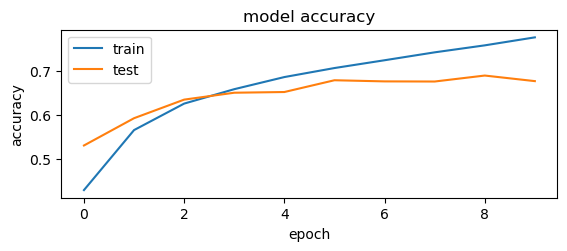

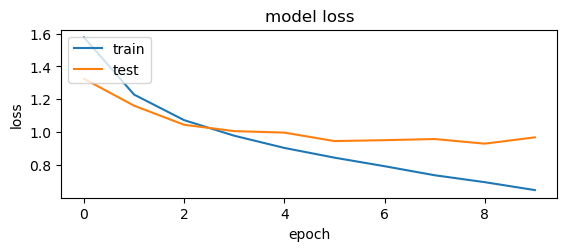

In [55]:
# Visualize Model Training History (Baseline Model)

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss (Baseline Model)

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:
#Saving Data
#Saving the Baseline Model to a file
model.save('BaseLineModel.h5')

#To load model:
from tensorflow.keras.models import load_model
baselineModel = load_model('BaseLineModel.h5')

In [92]:
#Baseline Model performance on the test data

test_loss, test_accuracy =baselineModel.evaluate(test_images, test_labels, verbose=2)
print('\nTest Loss:',test_loss)
print('\nTest accuracy:', test_accuracy*100)

313/313 - 2s - loss: 0.9706 - accuracy: 0.6726 - 2s/epoch - 5ms/step

Test Loss: 0.970649003982544

Test accuracy: 67.25999712944031


In [59]:
#Getting the predictions on the test images from the model
predictions = baselineModel.predict (test_images)
print(predictions.shape, test_labels.shape)


313/313 [==============================] - 3s 9ms/step
(10000, 10) (10000, 1)


In [60]:
#Display the Confusion Matrix for baseline model:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_labels, np.argmax(predictions, axis=1)))

#Displaying the classification report
print(classification_report(test_labels, np.argmax(predictions, axis=1)))

[[714  30  56   6  15   2  10  17 111  39]
 [ 15 850   5   5   1   3   9   1  35  76]
 [ 59  14 626  26  51  46  84  52  24  18]
 [ 33  32 133 338  56 160 105  66  44  33]
 [ 33  13 145  33 500  27 110 108  24   7]
 [ 20  11 112 108  46 517  41  98  27  20]
 [  9  18  58  24  21  11 808  18  17  16]
 [ 24  11  51  14  29  41  14 775   7  34]
 [ 54  40  18   4   0   4   5   7 840  28]
 [ 29 127   8   7   2   5   9  18  37 758]]
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1000
           1       0.74      0.85      0.79      1000
           2       0.52      0.63      0.57      1000
           3       0.60      0.34      0.43      1000
           4       0.69      0.50      0.58      1000
           5       0.63      0.52      0.57      1000
           6       0.68      0.81      0.74      1000
           7       0.67      0.78      0.72      1000
           8       0.72      0.84      0.78      1000
           9       0.74     

In [16]:
#Training the DataAugumneted model 
#print(train_generator.n//train_generator.batch_size, valid_generator.n//valid_generator.batch_size)
# Fitting the model to the data

start_time = time.time()

history1 = DataAugModel2.fit(train_generator,validation_data = valid_generator,steps_per_epoch = train_generator.n//train_generator.batch_size,validation_steps = valid_generator.n//valid_generator.batch_size,
epochs=5) 

end_time = time.time()
run_time_delta = round(end_time-start_time, 2)
print('Training time: {} seconds'.format(run_time_delta))

#Retrained for 70+20+5+10+5+5+5 more epochs


Epoch 1/5
500/500 [==============================] - 72s 142ms/step - loss: 0.6318 - accuracy: 0.7797 - val_loss: 0.7169 - val_accuracy: 0.7522
Epoch 2/5
500/500 [==============================] - 81s 161ms/step - loss: 0.6252 - accuracy: 0.7821 - val_loss: 0.7486 - val_accuracy: 0.7445
Epoch 3/5
500/500 [==============================] - 81s 163ms/step - loss: 0.6326 - accuracy: 0.7802 - val_loss: 0.7242 - val_accuracy: 0.7544
Epoch 4/5
500/500 [==============================] - 81s 163ms/step - loss: 0.6340 - accuracy: 0.7796 - val_loss: 0.7466 - val_accuracy: 0.7445
Epoch 5/5
500/500 [==============================] - 82s 165ms/step - loss: 0.6294 - accuracy: 0.7789 - val_loss: 0.7356 - val_accuracy: 0.7497
Training time: 397.85 seconds


In [17]:
 #Saving Data
#Saving the DataAugumented Model to 
DataAugModel.save('DataAugumentedModel2.h5')

#To load model:
from tensorflow.keras.models import load_model
DataAugModel = load_model('DataAugumentedModel.h5')
DataAugModel2= load_model('DataAugumentedModel2.h5 ')

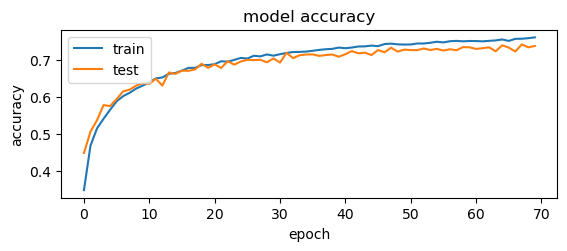

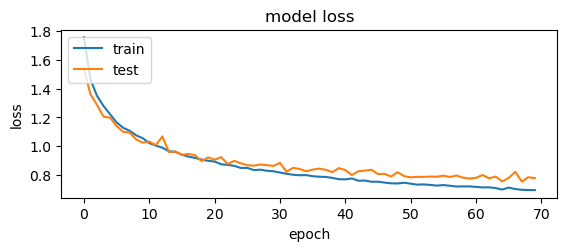

In [13]:
# Visualize Model Training History (DataAugumented Model)
plt.subplot(211)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss (DataAugumented Model)

plt.subplot(212)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [18]:
#DataAugumented Model performance on the test data

result=DataAugModel.evaluate(test_generator)
print('\nTest Loss:',result[0])
print('\nTest accuracy:',result[1]*100)


result2=DataAugModel2.evaluate(test_generator)
print('\nTest Loss:',result2[0])
print('\nTest accuracy:',result2[1]*100)



125/125 [==============================] - 6s 50ms/step - loss: 0.6839 - accuracy: 0.7741

Test Loss: 0.6838638186454773

Test accuracy: 77.41000056266785
125/125 [==============================] - 6s 49ms/step - loss: 0.6839 - accuracy: 0.7741

Test Loss: 0.6838638186454773

Test accuracy: 77.41000056266785


In [18]:
# Making predictions
predict = DataAugModel.predict(test_generator)
y_predict=predict.argmax(axis=1)

#Building and printing the COnfusion matrix and classification_report 

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test_generator.classes, y_predict))
print(classification_report(test_generator.classes, y_predict))

125/125 [==============================] - 15s 116ms/step
[[805  27  19   9   7   4  13  52  58   6]
 [  9 912   0   2   1   0   1   7  66   2]
 [ 68   9 624  28  66  66  32  10  17  80]
 [ 20  18  41 478  62 186  58  23  40  74]
 [ 22   6  35  23 712  26  99  14   8  55]
 [ 22   5  30  70  32 725  69   1  20  26]
 [ 11   6  13  18  23  32 867   1  20   9]
 [ 49  35   7   4   2   2   3 860  35   3]
 [ 12  72   4   4   2   1  11  17 872   5]
 [  7   5  18  21  18  12  11   8  14 886]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1000
           1       0.83      0.91      0.87      1000
           2       0.79      0.62      0.70      1000
           3       0.73      0.48      0.58      1000
           4       0.77      0.71      0.74      1000
           5       0.69      0.72      0.71      1000
           6       0.74      0.87      0.80      1000
           7       0.87      0.86      0.86      1000
           8       0.76 

In [ ]:
#Training the model by loading entire dataset into memory

In [84]:
#Recompiling the model and printing the summary of the DataAugumented model
dmodel.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam',
metrics=['accuracy'])
dmodel.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 2, 2, 64)        

In [96]:
# Train the model using the augmented data

#Predefining the steps for each epoch and storing it in steps variable
steps=int(train_images.shape[0]/128)

history2 = dmodel.fit(train_data, epochs=10,steps_per_epoch=steps, validation_data=(test_images, test_labels))


# We just need to reset the hyperparameter or recreate a newl model to train the model and increase the accuracy and the run time is very high as it require more number of epochs

Epoch 1/10
390/390 [==============================] - 55s 142ms/step - loss: 1.6249 - accuracy: 0.4121 - val_loss: 113.5770 - val_accuracy: 0.1797
Epoch 2/10
390/390 [==============================] - 50s 129ms/step - loss: 1.6187 - accuracy: 0.4122 - val_loss: 109.4573 - val_accuracy: 0.1867
Epoch 3/10
390/390 [==============================] - 52s 134ms/step - loss: 1.6090 - accuracy: 0.4177 - val_loss: 126.7631 - val_accuracy: 0.1739
Epoch 4/10
390/390 [==============================] - 52s 134ms/step - loss: 1.6082 - accuracy: 0.4188 - val_loss: 129.8615 - val_accuracy: 0.1742
Epoch 5/10
390/390 [==============================] - 52s 132ms/step - loss: 1.5979 - accuracy: 0.4228 - val_loss: 129.6623 - val_accuracy: 0.1773
Epoch 6/10
390/390 [==============================] - 61s 157ms/step - loss: 1.5876 - accuracy: 0.4280 - val_loss: 138.5399 - val_accuracy: 0.1843
Epoch 7/10
390/390 [==============================] - 52s 134ms/step - loss: 1.5825 - accuracy: 0.4299 - val_loss: 149

# 6. Overfiting Analysis:
• Compare the training and validation curves for the baseline and augmented models. 
Discuss any signs of overfiting observed during training.
• Explain how data augmentation helped mitigate overfiting in the augmented model

Baseline model:
From the model accuracy plot of baseline model we can conclude that model is getting overfitted and losing it’s ability to generalize the data
After the 3rd epoch we can see that the train data accuracy is increasing and the test accuracy is decreasing which means the model is getting more trained on the particular data and is not able to perform on the unseen data from the test images and this is called overfitting.
From the model loss plot of baseline model  we can conclude that the loss of the model for the test and train data is getting diverged after the third epoch which means the model is unable to predict the images which are in test data based on it’s training with the train data.


From the confusion matric and classification report of Base line model which gives how good the model is performing on test data after it’s being trained. As the model is getting overfitted it is unable to recognize the images of same of class when they are provided in different orientation and the actually class is being predicted as something else , we can observe this from below confusion matrix.

We can see that the test accuracy is 67 percent and after 3rd epoch the model is  getting overfitting and the test and train data is diverging. Hence we can’t even increases epochs.


Data Augmented Model:

From the model accuracy plot of the Data Augmented model we can observe that the test and train accuracy has no deviation and they started converging just after an epoch and the overfitting of model is almost minimized here by using the data augmentation. Here the model is performing well on both the training data and validation data and the accuracy is getting increased and model is generalizing the data 

From the model loss plot of the Data Augmented we can observe that the model loss is getting decreased significantly on both the test and train data which means the model performance is boosting

The test accuracy of the model is increased by 8 percent nearly after using the Data augmentation.

By using the data augmentation we have provided the model images in different orientation so that the model can generalize the features of particular images and can predict it correctly when it see the new image of same class with different orientation or flipping. This is how the data augmentation helped the model to deeply analyze the particular features of the different class images in the training data and validate it correctly on the test data.


# 7. Data Augmentation Visualization:
• Show a few examples of original images and their augmented counterparts.

In [23]:
path=os.path.join("cifar-10-data","train","Bird")
images = []
count = 0
for image_path in os.listdir(path):
    print(os.path.join(path,image_path))
    try:
        img = cv2.imread(os.path.join(path, image_path)) # read image file
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
        img = cv2.resize(img, (200, 200)) # Resize to 200x200
        images.append(img)
        count += 1
        if count >=4: 
            break
    except Exception as e:
        pass



cifar-10-data\train\Bird\img-10018.jpg
cifar-10-data\train\Bird\img-10027.jpg
cifar-10-data\train\Bird\img-1003.jpg
cifar-10-data\train\Bird\img-10057.jpg


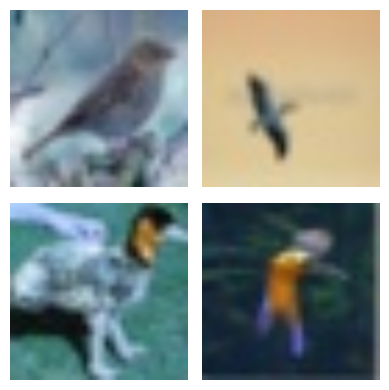

In [24]:
#Plotting the 4 images which are fetched from the path.
plt.figure(figsize=(4, 4))
for i, image in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
images_array = np.array(images)
print(images_array.shape)

(4, 200, 200, 3)


In [26]:
datagen1 = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    height_shift_range=0.2,
    width_shift_range=0.2,
    fill_mode="nearest"
)

In [27]:
augmented_images = []
num_augmentations = 4

for img in images_array:
    img_batch = np.expand_dims(img, axis=0)
    augmented_batch = datagen1.flow(img_batch, batch_size=1)
    for _ in range(num_augmentations):
        augmented_image = augmented_batch.next()[0].astype(np.uint8)
        augmented_images.append(augmented_image)
len(augmented_images)

16

In [28]:
output_folder = 'AugmentedImages'
os.makedirs(output_folder, exist_ok=True)

for i, augmented_image in enumerate(augmented_images):
    output_path = os.path.join(output_folder, f'augmented_image_{i}.jpg')
    cv2.imwrite(output_path, augmented_image)

print(f'{len(augmented_images)} augmented images saved to {output_folder}')

16 augmented images saved to AugmentedImages


In [34]:
path = os.path.join("AugmentedImages")
images = []
count = 0
for image_path in os.listdir(path):
    print(os.path.join(path, image_path))
    try:           
        img = cv2.imread(os.path.join(path, image_path)) # read image file
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (200, 200))  # Resize to 200x200
        images.append(img)
        
        count += 1
        if count >=16: break
    except Exception as e:
        pass

AugmentedImages\augmented_image_0.jpg
AugmentedImages\augmented_image_1.jpg
AugmentedImages\augmented_image_10.jpg
AugmentedImages\augmented_image_11.jpg
AugmentedImages\augmented_image_12.jpg
AugmentedImages\augmented_image_13.jpg
AugmentedImages\augmented_image_14.jpg
AugmentedImages\augmented_image_15.jpg
AugmentedImages\augmented_image_2.jpg
AugmentedImages\augmented_image_3.jpg
AugmentedImages\augmented_image_4.jpg
AugmentedImages\augmented_image_5.jpg
AugmentedImages\augmented_image_6.jpg
AugmentedImages\augmented_image_7.jpg
AugmentedImages\augmented_image_8.jpg
AugmentedImages\augmented_image_9.jpg


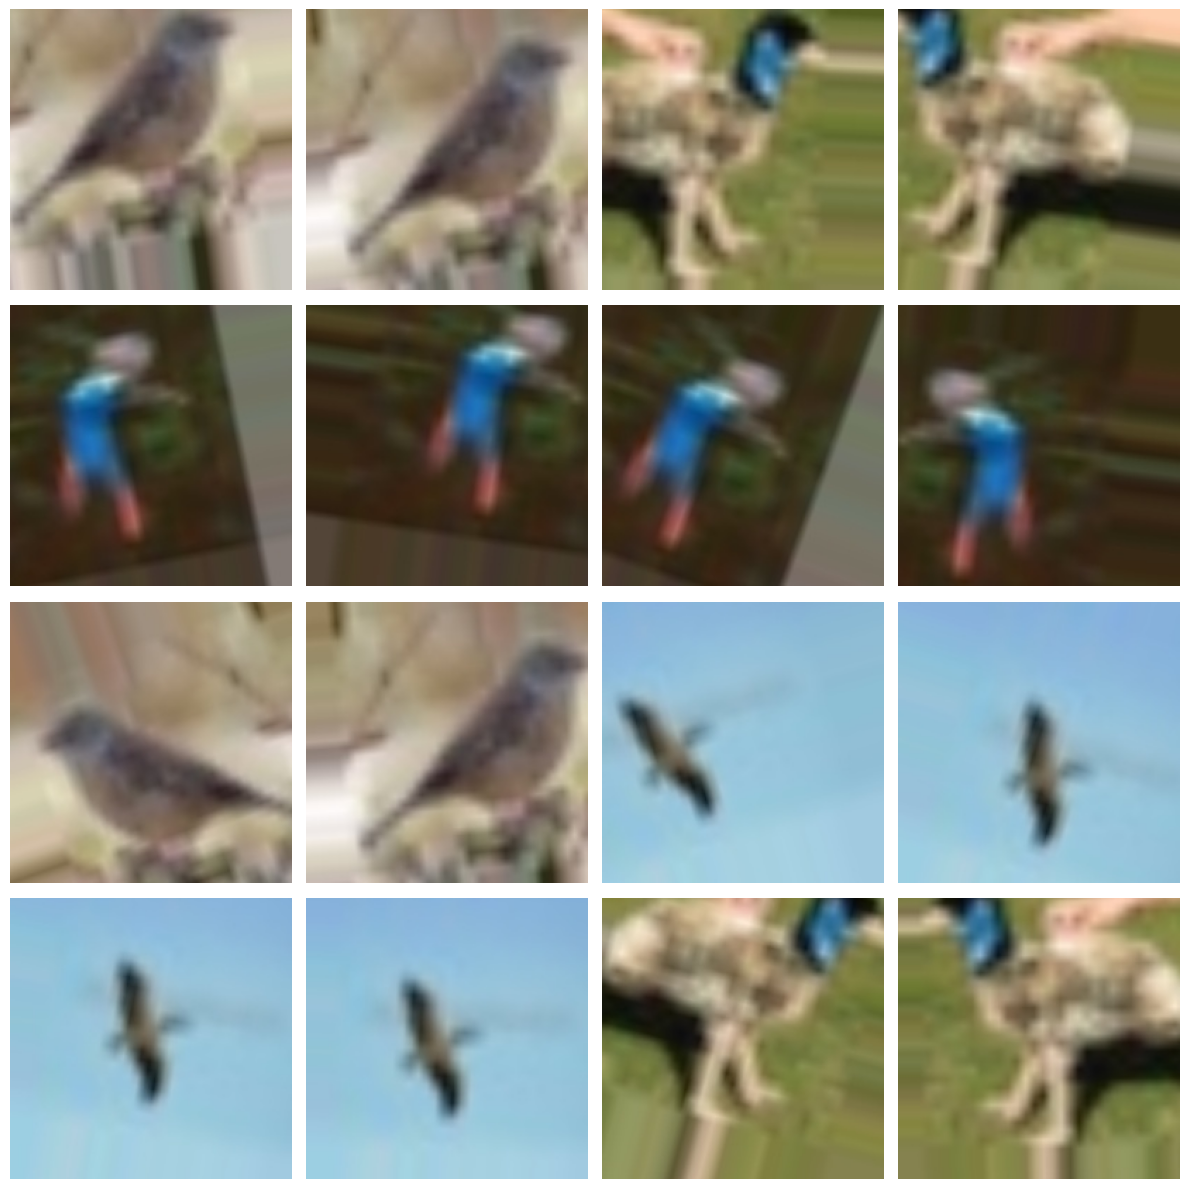

In [35]:
plt.figure(figsize=(12, 12))
for i, image in enumerate(images):
    plt.subplot(4, 4, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()
plt.show()

# 8. Discussion:
• Summarize your findings and compare the performance of the baseline and 
augmented models.
• Reflect on the benefits and challenges of using data augmentation in training CNN 
models

Baseline Model vs Augmented Model:

The baseline model test accuracy is less comapred to the augmented model and the performance of the baseline model is not as good as the augmented model.

The time taken for the convergence of the baseline model is less and it requires less number of epochs where the model performs goods whereas the augmented needs more number of epochs as the model is performing good on both training and test data which increases the training time

Baseline model has  the problem of the overfitting whereas the Augmented model has no problem of overfitting.


Benefits of Data Augmentation in CNN Training:

Increased Robustness: Data augmentation helps improve the model's robustness by exposing it to a more diverse set of training examples. This can make the model less sensitive to variations in lighting, rotation, scale, and other factors that may be present in real-world data.

Generalization: Augmented data allows the model to generalize better to unseen data. It helps prevent overfitting, as the model learns to recognize features and patterns under different conditions and viewpoints.

Larger Effective Dataset: Data augmentation effectively increases the size of the training dataset without the need for collecting more data. This is especially valuable when working with limited labeled data.

Improved Training Convergence: Augmentation can assist in faster and more stable convergence during training by introducing variation and reducing the likelihood of getting stuck in local minima.

Challenges of Data Augmentation in CNN Training:

Increased training time: After the data agumentation, the training time of the model is increased a lot.

Augmenting data can significantly increase the computational resources required for training. Each augmented sample requires additional processing time and memory.

Hyperparameter Tuning: Determining the appropriate set of augmentation techniques and parameters (e.g., rotation angle, scaling factor, brightness) can be challenging. It may require extensive experimentation and hyperparameter tuning to find the optimal configuration

It is tough to determine the model architecture which gives the best performance and takes more to determine the bestmodel 

